In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import glob
import datetime

In [3]:
# credible; makes dictionary of datasets sorted by user (credible), and dataframe of all credible tweets with username as additional column (credible_df) 
df_path = glob.glob('./Datasets/HealthOrg/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

    df_ls.append(covid)

healthorg_df = pd.concat(df_ls, ignore_index = True)

# fix dates

dates = []
for date in healthorg_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

healthorg_df["date"] = dates

# filter for tweets in first half of 2020

healthorg_df = healthorg_df[healthorg_df["date"] <= datetime.date(2020,5,25)]
healthorg_df = healthorg_df[healthorg_df["date"] >= datetime.date(2020, 3, 1)]
healthorg_df = healthorg_df.drop_duplicates("tweet")

df_names = []
for line in healthorg_df["username"].unique():
    df_names.append(line)


In [4]:
# Left News Outlets
df_path = glob.glob('./Datasets/News_Outlets/Left/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

leftnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in leftnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

leftnews_df["date"] = dates

leftnews_df = leftnews_df[leftnews_df["date"] <= datetime.date(2020,5,25)]
leftnews_df = leftnews_df[leftnews_df["date"] >= datetime.date(2020,3,1)]

leftnews_df = leftnews_df.drop_duplicates("tweet")

for line in leftnews_df["username"].drop_duplicates():
    df_names.append(line)

C:\Users\Maggie\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Right News Outlets
df_path = glob.glob('./Datasets/News_Outlets/Right/*.csv')
df_ls = []

for path in df_path:
    df = pd.read_csv(path)
    df = df[['username', 'tweet', 'date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
    covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
    df_ls.append(covid)

rightnews_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in rightnews_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

rightnews_df["date"] = dates

rightnews_df = rightnews_df[rightnews_df["date"] <= datetime.date(2020,5,25)]
rightnews_df = rightnews_df[rightnews_df["date"] >= datetime.date(2020,3,1)]

rightnews_df = rightnews_df.drop_duplicates("tweet")

for line in rightnews_df["username"].drop_duplicates():
    df_names.append(line)

In [6]:
# Right Individuals
df_path = glob.glob('./Datasets/Right/*.csv')
trump = pd.read_csv("./Datasets/Right/trump_tweets.csv") #https://www.kaggle.com/codebreaker619/donald-trump-tweets-dataset
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
        df_ls.append(covid)

    except:
        continue

right_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in right_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

right_df["date"] = dates

right_df = right_df[right_df["date"] <= datetime.date(2020, 5,25)]
right_df = right_df[right_df["date"] >= datetime.date(2020,3,1)]
right_df = right_df.drop_duplicates("tweet")

for line in right_df["username"].drop_duplicates():
    df_names.append(line)

# rename dataset columns to match others
trump["tweet"] = trump["text"]
trump["retweets_count"] = trump["retweets"]
trump["likes_count"] = trump["favorites"]
trump["retweet"] = trump["isRetweet"]
trump = trump[["tweet", "date", "retweets_count", "likes_count", "retweet"]]

#filter dates
trump_dates = trump["date"]
trump_dates_corr = []
trump_dates_corr = [d[:10] for d in trump_dates]
trump_dates_corr = [datetime.datetime.strptime(d, "%Y-%m-%d") for d in trump_dates_corr]
trump_dates_corr = [datetime.datetime.date(d) for d in trump_dates_corr]
trump["date"] = trump_dates_corr

trump = trump[trump["date"] >= datetime.date(2020, 3, 1)]
trump = trump[trump["date"] <= datetime.date(2020, 5,25)]

trump = trump[trump['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]

right_df = pd.concat([right_df, trump])

for line in right_df["username"].drop_duplicates().dropna():
    df_names.append(line)



In [7]:
# Left Individuals

df_path = glob.glob('./Datasets/Left/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

left_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in left_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

left_df["date"] = dates
left_df = left_df[left_df["date"] <= datetime.date(2020, 5,25)]
left_df = left_df[left_df["date"] >= datetime.date(2020, 3, 1)]
left_df = left_df.drop_duplicates("tweet")

for line in left_df["username"].drop_duplicates():
    df_names.append(line)

In [8]:
# Celebrities

df_path = glob.glob('./Datasets/Celebrities/*.csv')
df_ls = []

for path in df_path:
    try:
        df = pd.read_csv(path)
        df = df[['username', 'tweet','date', 'replies_count','retweets_count','likes_count','hashtags','retweet']]

    # general keywords used for dataset 4: ncov19, ncov2019, covid, rona, stayathome, socialdistancing
        covid = df.loc[df['tweet'].str.contains('covid|coronavirus|rona|wearamask|socialdistancing|stayathome|ncov|symptomatic|covax', case=False)]
    
        df_ls.append(covid)

    except:
        continue

celeb_df = pd.concat(df_ls, ignore_index = True)

dates = []

for date in celeb_df["date"]:
    test = datetime.datetime.strptime(date, "%Y-%m-%d")
    dates.append(test.date())

celeb_df["date"] = dates
celeb_df = celeb_df[celeb_df["date"] <= datetime.date(2020, 5,25)]
celeb_df = celeb_df[celeb_df["date"] >= datetime.date(2020, 3, 1)]
celeb_df = celeb_df.drop_duplicates("tweet")

for line in celeb_df["username"].drop_duplicates():
    df_names.append(line)

In [9]:
# fake news

CMU_fake = pd.read_csv("./Datasets/fake news/cmu_fake_hydrated.csv", index_col=0)
detection_fake = pd.read_csv("./Datasets/Covid19_FakeNews_Detection-master/detection_fake.csv")
#covidFake = pd.read_csv("./Datasets/fake news/covidFakesID_reformatted.csv", index_col=0)
misinformation = pd.read_csv("./Datasets/fake news/Misinformation_hydrated.csv", index_col=0)
fakeTweets = pd.read_csv("./Datasets/Cross-SEAN Dataset/Fake_Tweets.csv", index_col=0) # add if want to include first two spikes, otherwise comment out and take out of list

fake = [CMU_fake, detection_fake, misinformation, fakeTweets]

dfs = pd.concat(fake)

dfs = dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

fake_dfs = dfs

# fake_dfs = pd.concat([fake_dfs, dfs])

# fix date

dates = fake_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df

fake_dfs["date"] = dates
fake_dfs = fake_dfs.drop("created_at", axis=1)

fake_dfs = fake_dfs[fake_dfs["date"] >= datetime.date(2020, 3, 1)]
fake_dfs = fake_dfs[fake_dfs["date"] <= datetime.date(2020,5,25)]
fake_dfs = fake_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    fake_dfs = fake_dfs[fake_dfs["user_screen_name"].str.lower().str.contains(name) == False]


In [10]:
# real tweets

CMU_real = pd.read_csv("./Datasets/fake news/cmu_real_hydrated.csv", index_col=0)
realTweets = pd.read_csv("./Datasets/Cross-SEAN Dataset/Real_Tweets.csv", index_col=0)
detection_real = pd.read_csv("./Datasets/Covid19_FakeNews_Detection-master/detection_real.csv")

real_dfs = pd.concat([realTweets, CMU_real, detection_real])

real_dfs = real_dfs[["user_name", "user_screen_name", "text", "created_at", "retweet_count", "favorite_count", "hashtags", "user_followers_count", "user_verified"]]

# fix date
dates = real_dfs["created_at"]
dates = [date[4:10] + " " + date[-4:] for date in dates]

for i in range(len(dates)):
    test = datetime.datetime.strptime(dates[i], "%b %d %Y")
    dates[i] = test.date()

# reassigned back to df
real_dfs["date"] = dates
real_dfs = real_dfs[real_dfs["date"] >= datetime.date(2020, 3, 1)]
real_dfs = real_dfs[real_dfs["date"] <= datetime.date(2020, 5,25)]
real_dfs = real_dfs.drop("created_at", axis=1)
real_dfs = real_dfs.drop_duplicates("text")

for name in df_names: # removing overlap between groups
    real_dfs = real_dfs[real_dfs["user_screen_name"].str.lower().str.contains(name) == False]


In [11]:
%%capture
# make weighted retweets and likes columns for all datasets

# health organizations
file = pd.read_csv("healthorg_followers", usecols=[0, 1])
healthorg_followers = file["followers"].sum()
# keep likes and retweets separate, divide by followers
healthorg_df['retweets_weight'] = healthorg_df['retweets_count']/healthorg_followers
healthorg_df['likes_weight'] = healthorg_df['likes_count']/healthorg_followers

# left
file = pd.read_csv("left_followers", usecols=[0, 1])
left_followers = file["followers"].sum()
left_df['retweets_weight'] = left_df['retweets_count']/left_followers
left_df['likes_weight'] = left_df['likes_count']/left_followers

# right
file = pd.read_csv("right_followers", usecols=[0, 1])
right_followers = file["followers"].sum()
right_df['retweets_weight'] = right_df['retweets_count']/right_followers
right_df['likes_weight'] = right_df['likes_count']/right_followers

# celeb
file = pd.read_csv("celebrity_followers", usecols=[0, 1])
celeb_followers = file["followers"].sum()
celeb_df['retweets_weight'] = celeb_df['retweets_count']/celeb_followers
celeb_df['likes_weight'] = celeb_df['likes_count']/celeb_followers

# right news outlets
file = pd.read_csv("rightnews_followers", usecols=[0, 1])
rightnews_followers = file["followers"].sum()
rightnews_df['retweets_weight'] = rightnews_df['retweets_count']/rightnews_followers
rightnews_df['likes_weight'] = rightnews_df['likes_count']/rightnews_followers

# left news outlets
file = pd.read_csv("leftnews_followers", usecols=[0, 1])
leftnews_followers = file["followers"].sum()
leftnews_df['retweets_weight'] = leftnews_df['retweets_count']/leftnews_followers
leftnews_df['likes_weight'] = leftnews_df['likes_count']/leftnews_followers

# real
real_followers = real_dfs["user_followers_count"].drop_duplicates().sum()
real_dfs['retweets_weight'] = real_dfs['retweet_count']/real_followers
real_dfs['likes_weight'] = real_dfs['favorite_count']/real_followers

# fake
fake_followers = fake_dfs["user_followers_count"].drop_duplicates().sum()
fake_dfs['retweets_weight'] = fake_dfs['retweet_count']/fake_followers
fake_dfs['likes_weight'] = fake_dfs['favorite_count']/fake_followers


In [37]:
# make timelines for each group

# health
health_engage = healthorg_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
health_likes = health_engage.groupby('date')["likes_count"].sum()
health_retweets = health_engage.groupby('date')["retweets_count"].sum()

# right
right_engage = right_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
right_likes = right_engage.groupby('date')["likes_count"].sum()
right_retweets = right_engage.groupby('date')["retweets_count"].sum()

# left
left_engage = left_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
left_likes = left_engage.groupby('date')["likes_count"].sum()
left_retweets = left_engage.groupby('date')["retweets_count"].sum()

# celeb
celeb_engage = celeb_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
celeb_likes = celeb_engage.groupby('date')["likes_count"].sum()
celeb_retweets = celeb_engage.groupby('date')["retweets_count"].sum()

# left news
leftnews_engage = leftnews_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
leftnews_likes = leftnews_engage.groupby('date')["likes_count"].sum()
leftnews_retweets = leftnews_engage.groupby('date')["retweets_count"].sum()

# right news
rightnews_engage = rightnews_df[['date', 'likes_count', 'retweets_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
rightnews_likes = rightnews_engage.groupby('date')["likes_count"].sum()
rightnews_retweets = rightnews_engage.groupby('date')["retweets_count"].sum()

# real
real_engage = real_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
real_likes = real_engage.groupby('date')["favorite_count"].sum()
real_retweets = real_engage.groupby('date')["retweet_count"].sum()

# fake
fake_engage = fake_dfs[['date', 'favorite_count', 'retweet_count', 'likes_weight', 'retweets_weight']].sort_values("date", ascending=True)
fake_likes = fake_engage.groupby('date')["favorite_count"].sum()
fake_retweets = fake_engage.groupby('date')["retweet_count"].sum()



In [15]:
from scipy.stats import kendalltau
from scipy.special import comb
import math

def krcc_test(x, y):
    if len(x) == len(y):
        n = len(x)

        # default scipy is tau_b
        krcc = kendalltau(x, y)
        
        # https://github.com/mmhs013/pyMannKendall this also finds the tau and mann-kendall score but it doesnt do what we want
        
        print("KRCC =", krcc[0])

        # The two-sided p-value for a hypothesis test whose null hypothesis is an absence of association, tau = 0
        print("p value =", krcc[1])

    else:
        print("inconsistent number of points in x and y")

In [22]:
healthorg_df["date"] = pd.to_datetime(healthorg_df["date"])
right_df["date"] = pd.to_datetime(right_df["date"])
left_df["date"] = pd.to_datetime(left_df["date"])
rightnews_df["date"] = pd.to_datetime(rightnews_df["date"])
leftnews_df["date"] = pd.to_datetime(leftnews_df["date"])
celeb_df["date"] = pd.to_datetime(celeb_df["date"])
real_dfs["date"] = pd.to_datetime(real_dfs["date"])
fake_dfs["date"] = pd.to_datetime(fake_dfs["date"])

healthorg_dates = healthorg_df.sort_values("date", ascending=True)["date"].value_counts()
right_dates = right_df.sort_values("date", ascending=True)["date"].value_counts()
left_dates = left_df.sort_values("date", ascending=True)["date"].value_counts()
celeb_dates = celeb_df.sort_values("date", ascending=True)["date"].value_counts()
rightnews_dates = rightnews_df.sort_values("date", ascending=True)["date"].value_counts()
leftnews_dates = leftnews_df.sort_values("date", ascending=True)["date"].value_counts()
fake_tweets = fake_dfs.sort_values("date", ascending=True)["date"].value_counts()
real_tweets = real_dfs.sort_values("date", ascending=True)["date"].value_counts()

In [48]:
health_rt_bin = (health_retweets/healthorg_dates).resample('3D').sum()
right_rt_bin = (right_retweets/right_dates).resample('3D').sum()
left_rt_bin = (left_retweets/left_dates).resample('3D').sum()
rightnews_rt_bin = (rightnews_retweets/rightnews_dates).resample('3D').sum()
leftnews_rt_bin = (leftnews_retweets/leftnews_dates).resample('3D').sum()
celeb_rt_bin = (celeb_retweets/celeb_dates).resample('3D').sum()
real_rt_bin = (real_retweets/real_tweets).resample('3D').sum()
fake_rt_bin = (fake_retweets/fake_tweets).resample('3D').sum()

Text(0.5, 1.0, 'Average Fake Retweets')

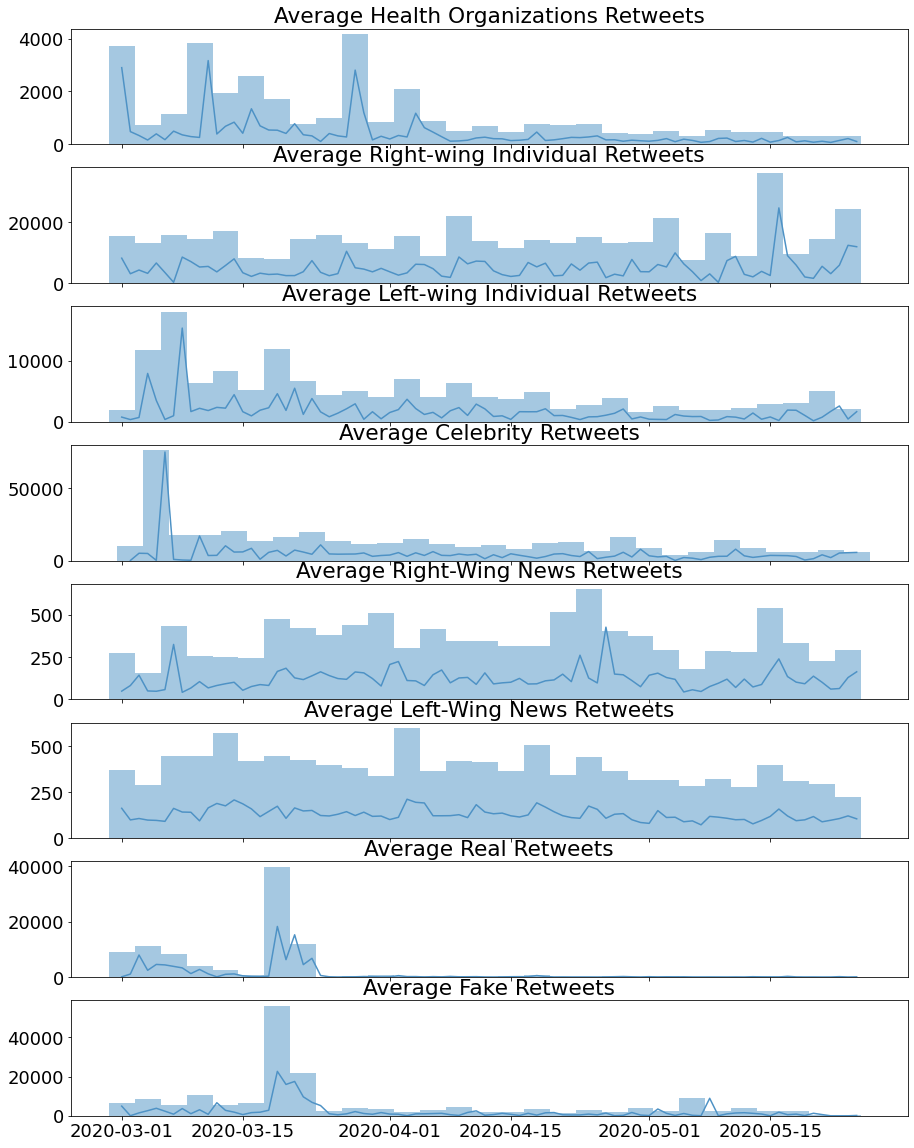

In [49]:
# plot avergae retweets
plt.rcParams.update({'font.size': 18})
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_retweets/healthorg_dates, color = '#4E92C5')
axes[0].bar((health_rt_bin).index.sort_values(), health_rt_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Retweets")

axes[1].plot(right_retweets/right_dates, color = '#4E92C5')
axes[1].bar(right_rt_bin.index.sort_values(), right_rt_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Retweets")

axes[2].plot(left_retweets/left_dates, color = '#4E92C5')
axes[2].bar(left_rt_bin.index.sort_values(), left_rt_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Retweets")

axes[3].plot(celeb_retweets/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_rt_bin.index.sort_values(), celeb_rt_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Retweets")

axes[4].plot(rightnews_retweets/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_rt_bin.index.sort_values(), rightnews_rt_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Retweets")

axes[5].plot(leftnews_retweets/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_rt_bin.index.sort_values(), leftnews_rt_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Retweets")

axes[6].plot(real_retweets/real_tweets, color = '#4E92C5')
axes[6].bar(real_rt_bin.index.sort_values(), real_rt_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Retweets")

axes[7].plot(fake_retweets/fake_tweets, color = '#4E92C5')
axes[7].bar(fake_rt_bin.index.sort_values(), fake_rt_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Retweets")

In [50]:
# bin likes
health_like_bin = (health_likes/healthorg_dates).resample('3D').sum()
right_like_bin = (right_likes/right_dates).resample('3D').sum()
left_like_bin = (left_likes/left_dates).resample('3D').sum()
rightnews_like_bin = (rightnews_likes/rightnews_dates).resample('3D').sum()
leftnews_like_bin = (leftnews_likes/leftnews_dates).resample('3D').sum()
celeb_like_bin = (celeb_likes/celeb_dates).resample('3D').sum()
real_like_bin = (real_likes/real_tweets).resample('3D').sum()
fake_like_bin = (fake_likes/fake_tweets).resample('3D').sum()

Text(0.5, 1.0, 'Average Fake Likes')

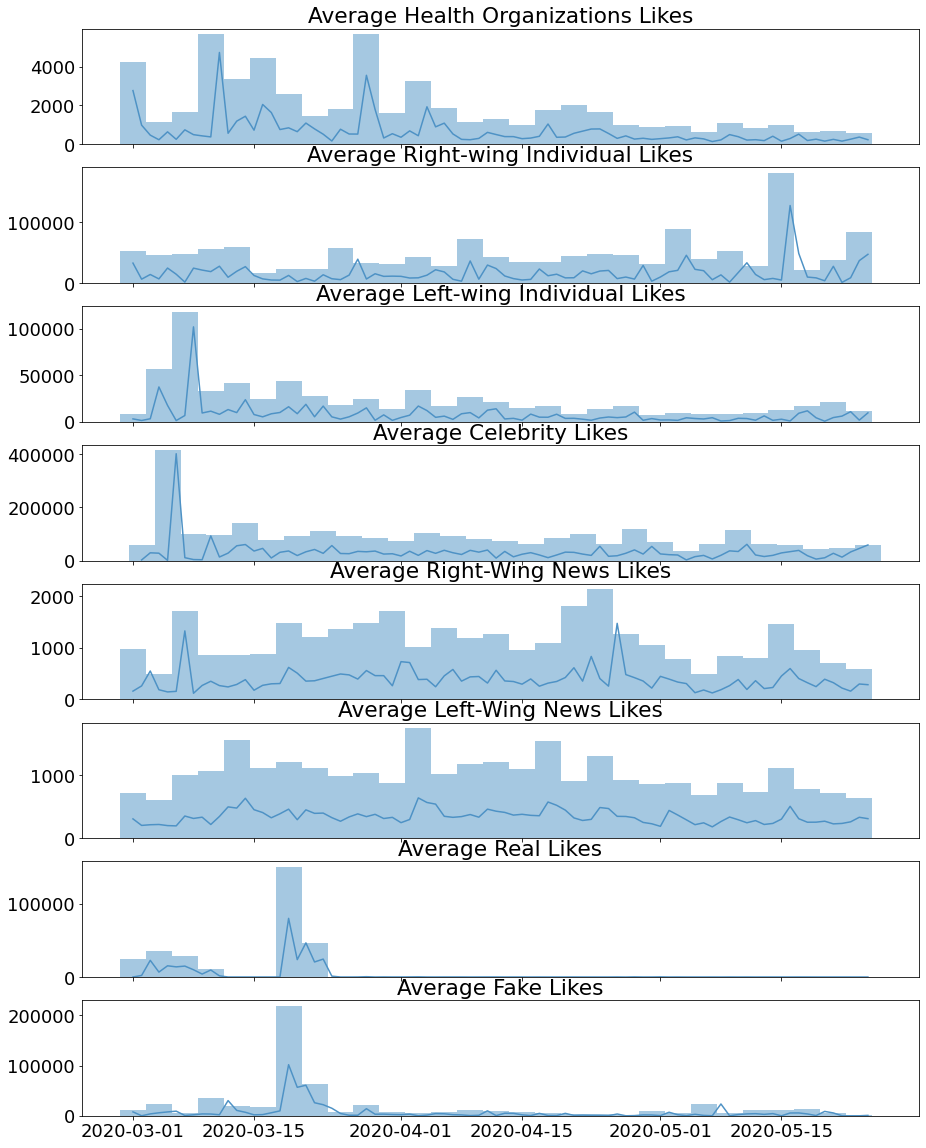

In [51]:
# plot likes divided by number of tweets
# plot
fig, axes = plt.subplots(8, 1, figsize=[15, 20], sharex=True)
axes[0].plot(health_likes/healthorg_dates, color = '#4E92C5')
axes[0].bar((health_like_bin).index.sort_values(), health_like_bin, width=3, color = '#A5C8E1')
axes[0].set_title("Average Health Organizations Likes")

axes[1].plot(right_likes/right_dates, color = '#4E92C5')
axes[1].bar(right_like_bin.index.sort_values(), right_like_bin, width=3, color = '#A5C8E1')
axes[1].set_title("Average Right-wing Individual Likes")

axes[2].plot(left_likes/left_dates, color = '#4E92C5')
axes[2].bar(left_like_bin.index.sort_values(), left_like_bin, width=3, color = '#A5C8E1')
axes[2].set_title("Average Left-wing Individual Likes")

axes[3].plot(celeb_likes/celeb_dates, color = '#4E92C5')
axes[3].bar(celeb_like_bin.index.sort_values(), celeb_like_bin, width=3, color = '#A5C8E1')
axes[3].set_title("Average Celebrity Likes")

axes[4].plot(rightnews_likes/rightnews_dates, color = '#4E92C5')
axes[4].bar(rightnews_like_bin.index.sort_values(), rightnews_like_bin, width=3, color = '#A5C8E1')
axes[4].set_title("Average Right-Wing News Likes")

axes[5].plot(leftnews_likes/leftnews_dates, color = '#4E92C5')
axes[5].bar(leftnews_like_bin.index.sort_values(), leftnews_like_bin, width=3, color = '#A5C8E1')
axes[5].set_title("Average Left-Wing News Likes")

axes[6].plot(real_likes/real_tweets, color = '#4E92C5')
axes[6].bar(real_like_bin.index.sort_values(), real_like_bin, width=3, color = '#A5C8E1')
axes[6].set_title("Average Real Likes")

axes[7].plot(fake_likes/fake_tweets, color = '#4E92C5')
axes[7].bar(fake_like_bin.index.sort_values(), fake_like_bin, width=3, color = '#A5C8E1')
axes[7].set_title("Average Fake Likes")

In [52]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nLeft News Outlet Tweets: \t{}\nRight News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_rt_bin), len(left_rt_bin), len(right_rt_bin), len(celeb_rt_bin), len(leftnews_rt_bin), len(rightnews_rt_bin), len(fake_rt_bin), len(real_rt_bin)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Left News Outlet Tweets: 	29
Right News Outlet Tweets:	29
Fake Tweets:		29
Real Tweets:		29



In [53]:
print("HealthOrg Tweets: \t{}\nLeft Tweets: \t{}\nRight Tweets: \t{}\nCeleb Tweets: \t{}\nRight News Outlet Tweets: \t{}\nLeft News Outlet Tweets:\t{}\nFake Tweets:\t\t{}\nReal Tweets:\t\t{}\n".format(len(health_like_bin), len(left_like_bin), len(right_like_bin), len(celeb_like_bin), len(rightnews_like_bin), len(leftnews_like_bin), len(fake_like_bin), len(real_like_bin)))


HealthOrg Tweets: 	29
Left Tweets: 	29
Right Tweets: 	29
Celeb Tweets: 	29
Right News Outlet Tweets: 	29
Left News Outlet Tweets:	29
Fake Tweets:		29
Real Tweets:		29



In [54]:
print("retweet/frequency")

print("real and health")
krcc_test(real_rt_bin/real_bins, health_rt_bin/health_bins)
print("real and left")
krcc_test(real_rt_bin/real_bins, left_rt_bin/left_bins)
print("real and right")
krcc_test(real_rt_bin/real_bins, right_rt_bin/right_bins)
print("real and celeb")
krcc_test((real_rt_bin/real_bins), celeb_rt_bin/celeb_bins)
print("real and right news")
krcc_test(real_rt_bin/real_bins, rightnews_rt_bin/rightnews_bins)
print("real and left news")
krcc_test(real_rt_bin/real_bins, leftnews_rt_bin/leftnews_bins)

print("\nfake and health")
krcc_test(fake_rt_bin/fake_bins, (health_rt_bin/health_bins))
print("fake and left")
krcc_test(fake_rt_bin/fake_bins, (left_rt_bin/left_bins))
print("fake and right")
krcc_test(fake_rt_bin/fake_bins, (right_rt_bin/right_bins))
print("fake and celeb")
krcc_test(fake_rt_bin/fake_bins, celeb_rt_bin/celeb_bins)
print("fake and right news")
krcc_test(fake_rt_bin/fake_bins, (rightnews_rt_bin/rightnews_bins))
print("fake and left news")
krcc_test(fake_rt_bin/fake_bins, (leftnews_rt_bin/leftnews_bins))

retweet/frequency
real and health
KRCC = 0.3152709359605911
p value = 0.016235008804067922
real and left
KRCC = 0.34482758620689646
p value = 0.008271754080026878
real and right
KRCC = -0.23152709359605908
p value = 0.08100168883744117
real and celeb
KRCC = 0.11330049261083742
p value = 0.40197405871901914
real and right news
KRCC = -0.15763546798029554
p value = 0.23965416707737744
real and left news
KRCC = 0.039408866995073885
p value = 0.7803827254931988

fake and health
KRCC = -0.07389162561576354
p value = 0.5896020010436087
fake and left
KRCC = -0.03448275862068965
p value = 0.809067167783547
fake and right
KRCC = -0.019704433497536943
p value = 0.8964941426465813
fake and celeb
KRCC = -0.18719211822660095
p value = 0.16079583550930335
fake and right news
KRCC = -0.08374384236453201
p value = 0.5392284343702975
fake and left news
KRCC = -0.004926108374384236
p value = 0.9851733530973003


In [24]:
print("retweets")
print("real and health")
krcc_test(real_rt_bin, health_rt_bin)
print("real and left")
krcc_test(real_rt_bin, left_rt_bin)
print("real and right")
krcc_test(real_rt_bin, right_rt_bin)
print("real and celeb")
krcc_test((real_rt_bin), celeb_rt_bin)
print("real and right news")
krcc_test(real_rt_bin, rightnews_rt_bin)
print("real and left news")
krcc_test(real_rt_bin, leftnews_rt_bin)

print("\nfake and health")
krcc_test(fake_rt_bin, health_rt_bin)
print("fake and left")
krcc_test(fake_rt_bin, left_rt_bin)
print("fake and right")
krcc_test(fake_rt_bin, right_rt_bin)
print("fake and celeb")
krcc_test(fake_rt_bin, celeb_rt_bin)
print("fake and right news")
krcc_test(fake_rt_bin, rightnews_rt_bin)
print("fake and left news")
krcc_test(fake_rt_bin, leftnews_rt_bin)

retweets
real and health
KRCC = 0.39901477832512305
p value = 0.002044164558588477
real and left
KRCC = 0.5369458128078817
p value = 1.894590061819408e-05
real and right
KRCC = 0.29064039408866993
p value = 0.02724570500361764
real and celeb
KRCC = 0.42364532019704426
p value = 0.0010049296277933138
real and right news
KRCC = 0.12315270935960589
p value = 0.36125600024923277
real and left news
KRCC = 0.29064039408866993
p value = 0.02724570500361764

fake and health
KRCC = 0.5123152709359604
p value = 5.009293633329531e-05
fake and left
KRCC = 0.42364532019704426
p value = 0.0010049296277933138
fake and right
KRCC = 0.33497536945812806
p value = 0.010425310470696099
fake and celeb
KRCC = 0.4187192118226601
p value = 0.001162854608381249
fake and right news
KRCC = 0.16748768472906403
p value = 0.21085097172082742
fake and left news
KRCC = 0.33497536945812806
p value = 0.010425310470696099


In [25]:
print("likes")
print("real and health")
krcc_test(real_like_bin, health_like_bin)
print("real and left")
krcc_test(real_like_bin, left_like_bin)
print("real and right")
krcc_test(real_like_bin, right_like_bin)
print("real and celeb")
krcc_test((real_like_bin), celeb_like_bin)
print("real and right news")
krcc_test(real_like_bin, rightnews_like_bin)
print("real and left news")
krcc_test(real_like_bin, leftnews_like_bin)

print("\nfake and health")
krcc_test(fake_like_bin, health_like_bin)
print("fake and left")
krcc_test(fake_like_bin, left_like_bin)
print("fake and right")
krcc_test(fake_like_bin, right_like_bin)
print("fake and celeb")
krcc_test(fake_like_bin, celeb_like_bin)
print("fake and right news")
krcc_test(fake_like_bin, rightnews_like_bin)
print("fake and left news")
krcc_test(fake_like_bin, leftnews_like_bin)

likes
real and health
KRCC = 0.29064039408866993
p value = 0.02724570500361764
real and left
KRCC = 0.4088669950738915
p value = 0.0015477990485178368
real and right
KRCC = 0.2216748768472906
p value = 0.0952209757990729
real and celeb
KRCC = 0.37931034482758613
p value = 0.0034854220737451018
real and right news
KRCC = 0.24630541871921177
p value = 0.06289740929880915
real and left news
KRCC = 0.1527093596059113
p value = 0.2550323155768218

fake and health
KRCC = 0.33497536945812806
p value = 0.010425310470696099
fake and left
KRCC = 0.4827586206896551
p value = 0.00014785097491601916
fake and right
KRCC = 0.0689655172413793
p value = 0.6155613796360289
fake and celeb
KRCC = 0.33497536945812806
p value = 0.010425310470696099
fake and right news
KRCC = 0.07389162561576354
p value = 0.5896020010436087
fake and left news
KRCC = 0.2364532019704433
p value = 0.07455541175113353


In [55]:
print("like/frequency")

print("real and health")
krcc_test(real_like_bin/real_bins, health_like_bin/health_bins)
print("real and left")
krcc_test(real_like_bin/real_bins, left_like_bin/left_bins)
print("real and right")
krcc_test(real_like_bin/real_bins, right_like_bin/right_bins)
print("real and celeb")
krcc_test(real_like_bin/real_bins, celeb_like_bin/celeb_bins)
print("real and right news")
krcc_test(real_like_bin/real_bins, rightnews_like_bin/rightnews_bins)
print("real and left news")
krcc_test(real_like_bin/real_bins, leftnews_like_bin/leftnews_bins)

print("\nfake and health")
krcc_test(fake_like_bin/fake_bins, (health_like_bin/health_bins))
print("fake and left")
krcc_test(fake_like_bin/fake_bins, (left_like_bin/left_bins))
print("fake and right")
krcc_test(fake_like_bin/fake_bins, (right_like_bin/right_bins))
print("fake and celeb")
krcc_test(fake_like_bin/fake_bins, celeb_like_bin/celeb_bins)
print("fake and right news")
krcc_test(fake_like_bin/fake_bins, (rightnews_like_bin/rightnews_bins))
print("fake and left news")
krcc_test(fake_like_bin/fake_bins, (leftnews_like_bin/leftnews_bins))

like/frequency
real and health
KRCC = 0.2807881773399014
p value = 0.03315447182691332
real and left
KRCC = 0.20197044334975367
p value = 0.12947419294177478
real and right
KRCC = -0.14285714285714282
p value = 0.28777237927148247
real and celeb
KRCC = 0.009852216748768471
p value = 0.9555401469615349
real and right news
KRCC = 0.2068965517241379
p value = 0.12013974731191734
real and left news
KRCC = 0.019704433497536943
p value = 0.8964941426465813

fake and health
KRCC = -0.0689655172413793
p value = 0.6155613796360289
fake and left
KRCC = 0.0
p value = 1.0
fake and right
KRCC = -0.1280788177339901
p value = 0.3418851403961595
fake and celeb
KRCC = -0.18226600985221672
p value = 0.1723937936829294
fake and right news
KRCC = -0.2216748768472906
p value = 0.0952209757990729
fake and left news
KRCC = -0.06403940886699505
p value = 0.6420016019879978
